# Oasis Infobyte Data Science Internship

## Task 5: Sales Prediction

### Shayan Chakraborty

## Importing the Libraries and packages

In [77]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [78]:
advertise_df = pd.read_csv('./csv_files/advertising.csv')

In [79]:
advertise_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [80]:
advertise_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [81]:
advertise_df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [82]:
advertise_df.shape

(200, 5)

In [83]:
advertise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [84]:
 advertise_df = advertise_df.drop(columns=['Unnamed: 0'])

In [85]:
advertise_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [86]:
print("\nChecking for null values:")

print(advertise_df.isnull().sum())


Checking for null values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [87]:
advertise_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

### Pairplots

<Figure size 640x480 with 0 Axes>

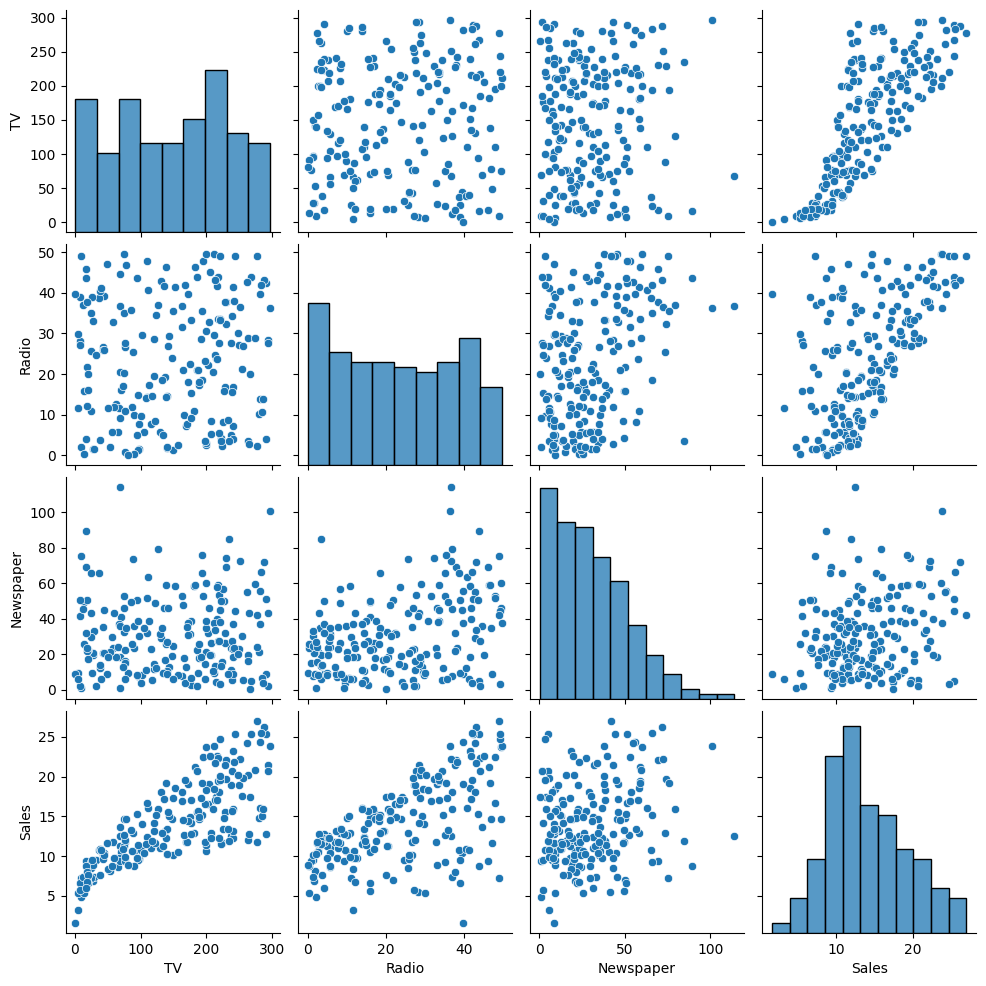

In [104]:
plt.suptitle('Pairplot of Advertising Channels and Sales', y=1.02)

sns.pairplot(advertise_df)

plt.show()

### Correlation Heatmap

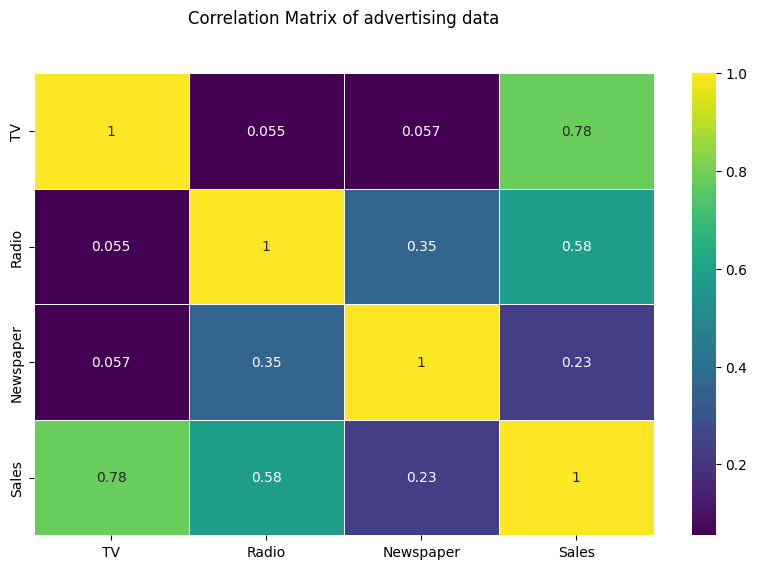

In [89]:
correlation_matrix = advertise_df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Correlation Matrix of advertising data\n\n')
plt.show()

### Histogram of sales

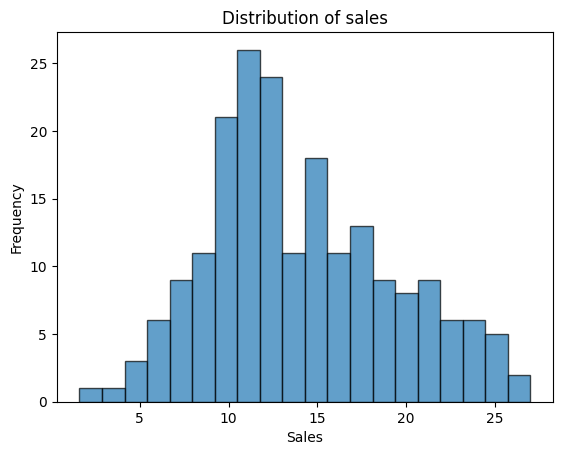

In [90]:
plt.hist(advertise_df['Sales'], bins=20, edgecolor='k', alpha=0.7)

plt.xlabel('Sales')


plt.ylabel('Frequency')

plt.title('Distribution of sales')
plt.show()

### Sales vs advertising channels

#### Sales vs TV

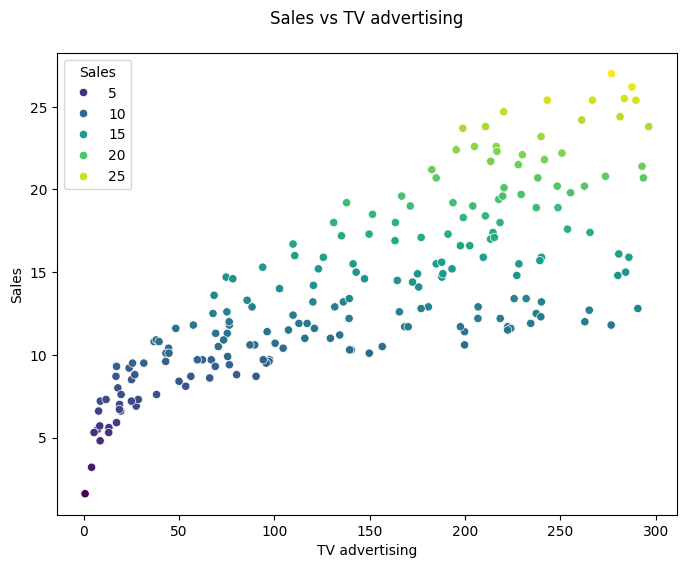

In [91]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=advertise_df, x='TV', y='Sales', hue='Sales', palette='viridis')

plt.title('Sales vs TV advertising\n')

plt.xlabel('TV advertising')
plt.ylabel('Sales')
plt.show()

#### Sales vs radio

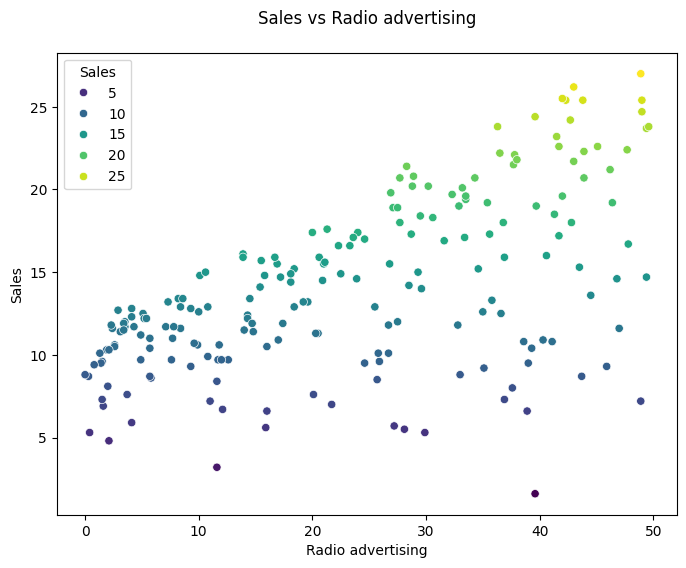

In [92]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=advertise_df, x='Radio', y='Sales', hue='Sales', palette='viridis')

plt.title('Sales vs Radio advertising\n')
plt.xlabel('Radio advertising')
plt.ylabel('Sales')
plt.show()

#### Sales vs newspaper

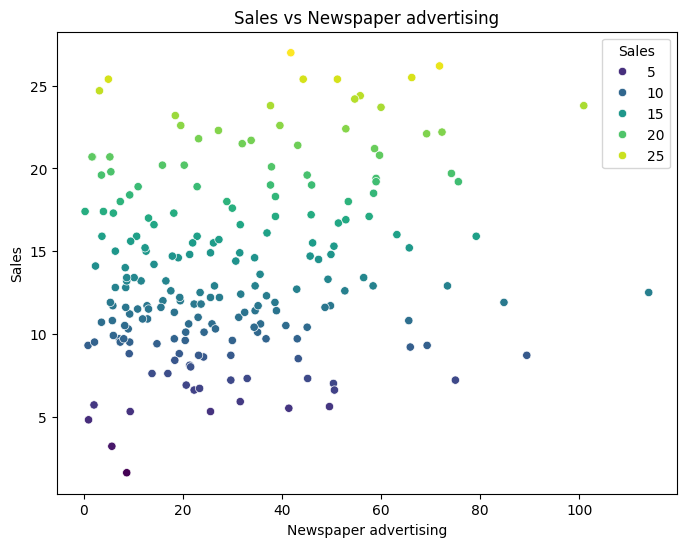

In [93]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=advertise_df, x='Newspaper', y='Sales', hue='Sales', palette='viridis')

plt.title('Sales vs Newspaper advertising')

plt.xlabel('Newspaper advertising')

plt.ylabel('Sales')
plt.show()

### Boxplot of sales

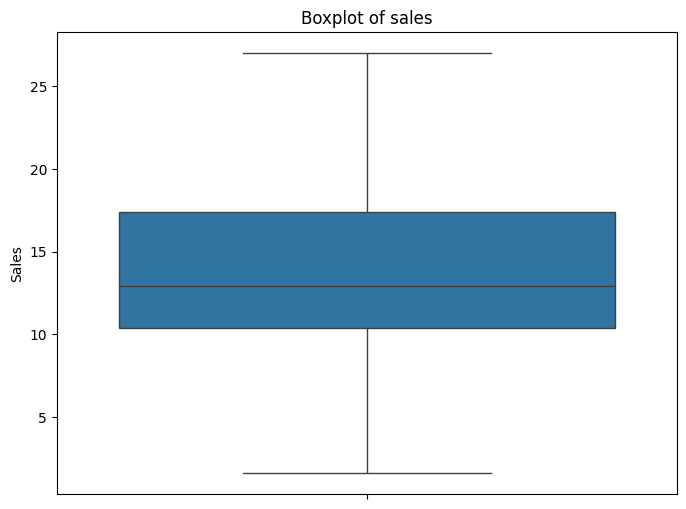

In [94]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=advertise_df['Sales'])

plt.ylabel('Sales')

plt.title('Boxplot of sales')
plt.show()

### Finding outliers

In [95]:
def find_outliers(df):
    outlier_percentages = []
    
    for column in df.columns:
        
        if df[column].dtype != object:
            
            # first we calculate the first and third quartlies
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            
            # here we calculate the interquartile range 
            iqr = q3 - q1
            
        #lower and upper bound quartiles
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
         
            num_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
            
#percentage of outliers is important
            outlier_percentage = (num_outliers / len(df[column])) * 100
            
           
            outlier_percentages.append((column, round(outlier_percentage, 2)))
    
   
    outlier_df = pd.DataFrame(outlier_percentages, columns=['Column', 'Outlier Percentage'])
    
   
    outlier_df = outlier_df.sort_values(by='Outlier Percentage', ascending=False).reset_index(drop=True)
    
    return outlier_df

outlier_df = find_outliers(advertise_df)

print("\nOutlier percentage in the dataset:")
print(outlier_df)


Outlier percentage in the dataset:
      Column  Outlier Percentage
0  Newspaper                 1.0
1         TV                 0.0
2      Radio                 0.0
3      Sales                 0.0


### Removing the outliers

In [96]:
def remove_outliers(df):
    
    data_clean = df.copy()
    
    for column in data_clean.columns:
        
        if data_clean[column].dtype != object:
            
          
            q1 = data_clean[column].quantile(0.25)
            q3 = data_clean[column].quantile(0.75)
            

            iqr = q3 - q1
            
     
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
          #finally we remove the outliers
            data_clean = data_clean[(data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)]
    
    return data_clean

data_clean = remove_outliers(advertise_df)

print("\nData after removing outliers:")

print(data_clean.describe())



Data after removing outliers:
               TV       Radio   Newspaper       Sales
count  198.000000  198.000000  198.000000  198.000000
mean   146.688384   23.130808   29.777273   13.980808
std     85.443221   14.862111   20.446303    5.196097
min      0.700000    0.000000    0.300000    1.600000
25%     74.800000    9.925000   12.650000   10.325000
50%    149.750000   22.400000   25.600000   12.900000
75%    218.475000   36.325000   44.050000   17.375000
max    293.600000   49.600000   89.400000   27.000000


### Feature selection

In [97]:
X = data_clean[['TV', 'Radio', 'Newspaper']]

y = data_clean['Sales']

### train test split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing 

In [99]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model Training and evaluation

In [100]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:\n")

print("Mean squared error:", mse)

print("R Squared:", r2)


Model Evaluation:

Mean squared error: 2.740911906689996
R Squared: 0.8989454779619588


### Model prediction

In [101]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [20]})

new_data_scaled = scaler.transform(new_data)

predicted_sales = model.predict(new_data_scaled)

print("\npredicted sales for new data \nTV 200, Radio: 40, Newspaper: 20\n", predicted_sales)


predicted sales for new data 
TV 200, Radio: 40, Newspaper: 20
 [19.42223695]


In [102]:
print("Accuracy of the model is 89.89%\n")

print("The amount spent on Tv advertisement has the strongest positive correlation with sales\n")

print("Radio advertising is moderately positively correlated with sales\n")

print("The amount spent on newspaper advertising has the weakest correlation with sales")

Accuracy of the model is 89.89%

The amount spent on Tv advertisement has the strongest positive correlation with sales

Radio advertising is moderately positively correlated with sales

The amount spent on newspaper advertising has the weakest correlation with sales


## Description of the entire project

## Imports

#### Firstly, we import the necessary libraries Numpy, pandas, matplotlib, seaborn, scikit learn

### Loading the dataset

#### After loading the dataset we explore it using various methods like head(), tail(), info(), describe() and check for missing 

#### values using isnull().sum()

### Data visualizations

#### We then perform data visualizations to find out the relationship between different attributes and distribution of data- 

#### Pairplots, scatterplots, boxplots, histogram, correlation heatmap, help us to do that

### Data Cleaning

#### The dataset is clean except for an unnecessary ID column so we drop that and we also check for outliers and remove them 

#### to improve model accuracy

### Feature selection

#### We now select the target variable: Sales and the features: Tv, radio, newspaper

### Train test split and Model Training

#### Then we perform a train test split and train the Linear regression model for prediction 

### Model Evaluation

#### The evaluation of the model is done using Mean Squared Error and R Squared. The accuracy comes out to be 89.89%

### Model Prediction and inference

Finally we use the model to predict the sales and draw the inference